In [1]:
# Importing the required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
# Import core excel sheet
Reference = pd.read_csv('reference.csv')

In [3]:
Reference.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17015 entries, 0 to 17014
Data columns (total 32 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   customer_id                          17015 non-null  int64  
 1   gender                               17015 non-null  object 
 2   past_3_years_bike_related_purchases  17015 non-null  int64  
 3   DOB                                  17015 non-null  object 
 4   job_title                            17015 non-null  object 
 5   job_industry_category                17015 non-null  object 
 6   wealth_segment                       17015 non-null  object 
 7   owns_car                             17015 non-null  bool   
 8   tenure                               17015 non-null  int64  
 9   postcode                             17015 non-null  int64  
 10  state                                17015 non-null  object 
 11  property_valuation          

In [4]:
def missing_data_summary(df):
    """
    Calculate and display the number of missing data, total data, percentage of missing data, number of unique values, and data type for each column in the DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame.
    """
    # Get the total number of rows in the DataFrame
    total_rows = df.shape[0]
    
    # Calculate the count of missing values for each column
    missing_count = df.isnull().sum()
    
    # Calculate the total number of data points for each column
    total_count = df.count()
    
    # Calculate the percentage of missing values for each column
    missing_percentage = (missing_count / total_rows) * 100
    
    # Calculate the number of unique values for each column
    unique_count = df.nunique()
    
    # Get the data types for each column
    data_types = df.dtypes
    
    # Create a summary DataFrame
    summary_df = pd.DataFrame({
        'Missing Count': missing_count,
        'Total Count': total_count,
        'Missing Percentage': missing_percentage,
        'Unique Values': unique_count,
        'Data Type': data_types
    })
    
    return summary_df

In [5]:
missing =missing_data_summary(Reference)

In [6]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

def univariate_analysis(df):
    """
    Perform univariate analysis using Seaborn (whitegrid style) and Matplotlib based on the input DataFrame.
    
    Parameters:
    df (pandas.DataFrame): The input DataFrame.
    """
    # Set the Seaborn style to whitegrid
    sns.set_style("whitegrid")
    
    # Create the summary DataFrame
    summary_df = pd.DataFrame({
        'Missing Count': df.isnull().sum(),
        'Total Count': df.count(),
        'Missing Percentage': (df.isnull().sum() / df.shape[0]) * 100,
        'Unique Values': df.nunique(),
        'Data Type': df.dtypes
    })
    
    # Iterate through each column in the summary DataFrame
    for col in summary_df.index:
        # Check the data type of the column
        data_type = summary_df.at[col, 'Data Type']
        
        # Handle numeric columns
        if data_type in [int, float]:
            # Create subplots
            fig, axes = plt.subplots(1, 2, figsize=(12, 5))

            # Plot a histogram with mean and median lines
            sns.histplot(df[col], bins=20, ax=axes[0])
            axes[0].set_title(f'Histogram of {col}')
            
            # Calculate mean and median
            mean_val = df[col].mean()
            median_val = df[col].median()
            
            # Draw vertical lines for mean and median
            axes[0].axvline(x=mean_val, color='red', linestyle='--', label='Mean')
            axes[0].axvline(x=median_val, color='blue', linestyle='--', label='Median')
            axes[0].legend()

            # Plot a boxplot with custom markers
            sns.boxplot(x=col, data=df, ax=axes[1], notch=True, linewidth=1.5, width=0.4, fliersize=5, palette="pastel")
            axes[1].set_title(f'Boxplot of {col}')
            
            plt.tight_layout()
        
        # Handle object (categorical) columns
        elif data_type == object:
            # Get the top unique values and their counts
            top_values = df[col].value_counts(normalize=True).head(10)
            
            # Create a bar plot for the distribution of top unique values
            plt.figure(figsize=(8, 5))
            ax = sns.barplot(x=top_values.index, y=top_values.values * 100)
            plt.xticks(rotation=45, ha="right")
            plt.title(f'Top Unique Value Distribution of {col}')
            plt.ylabel('Percentage (%)')
            
            # Annotate each bar with the percentage value
            for i, p in enumerate(ax.patches):
                ax.annotate(f"{top_values.values[i] * 100:.2f}%", 
                            (p.get_x() + p.get_width() / 2., p.get_height()), 
                            ha='center', va='center', fontsize=8, color='black', xytext=(0, 5), 
                            textcoords='offset points')
            
            plt.tight_layout()

        # Display the plots
        plt.show()

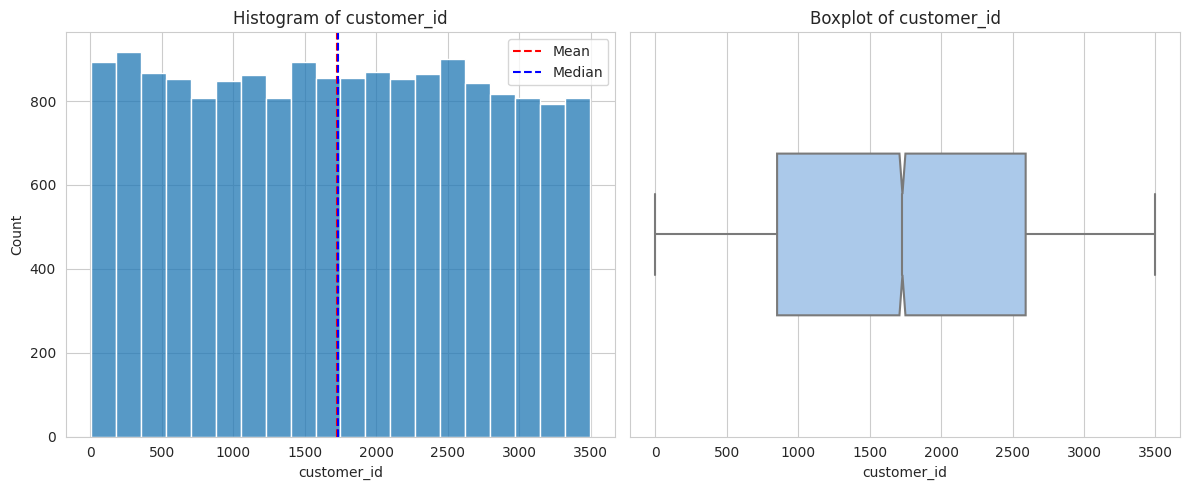

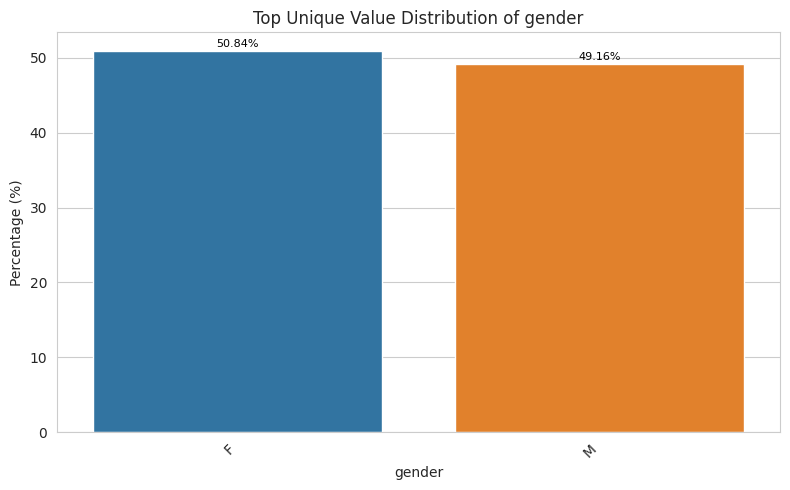

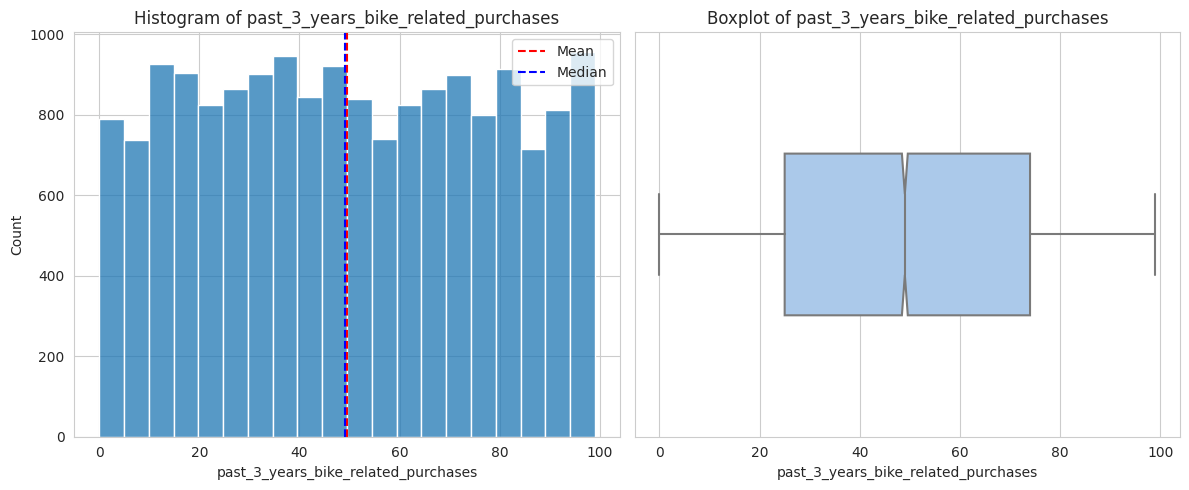

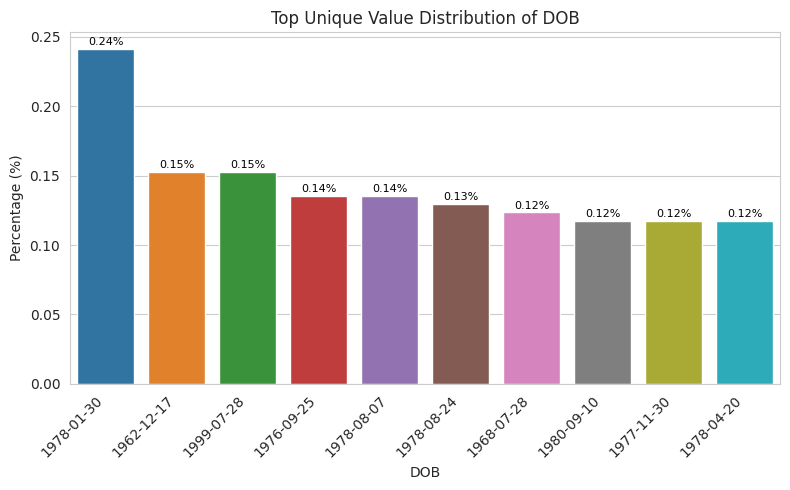

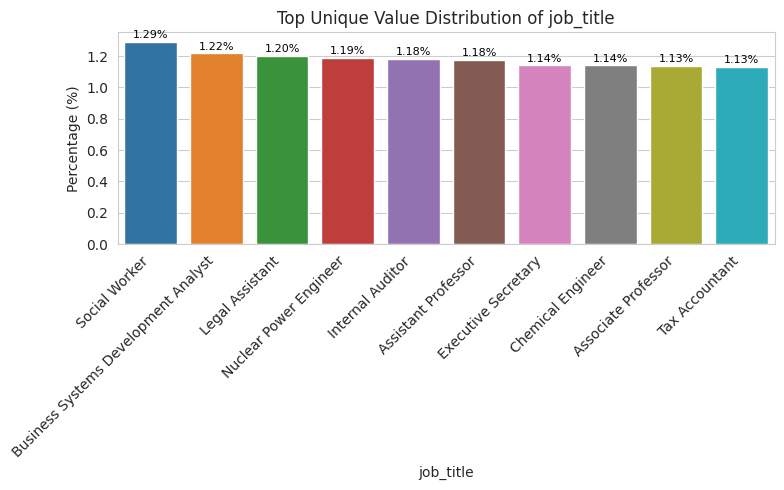

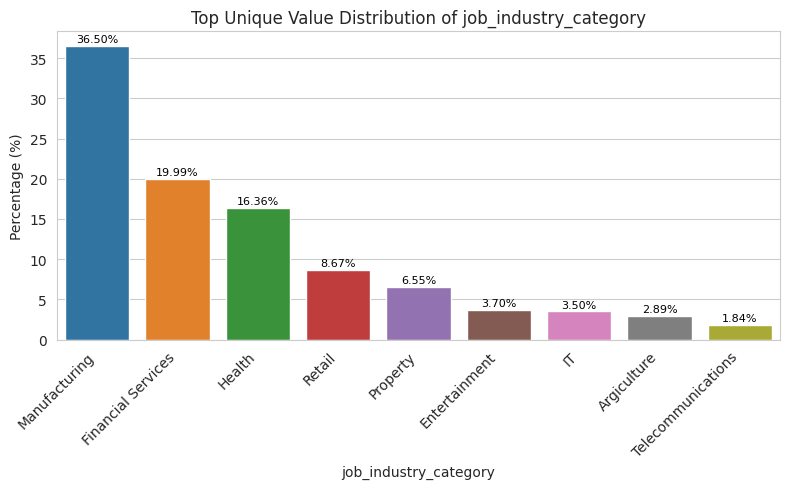

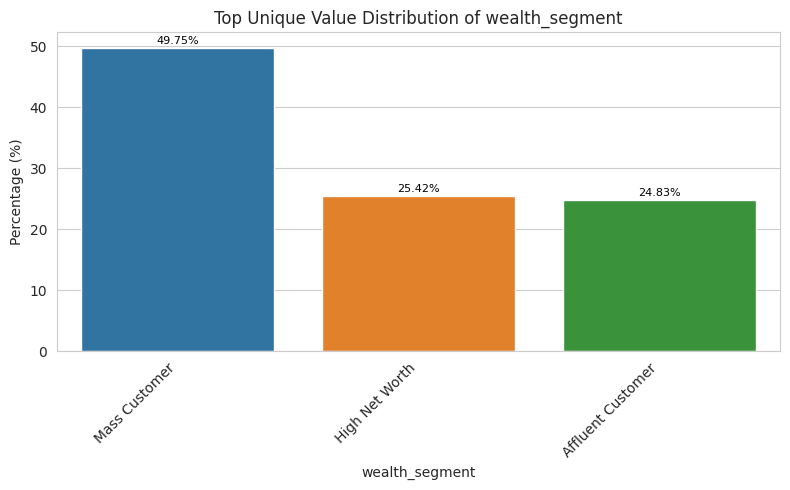

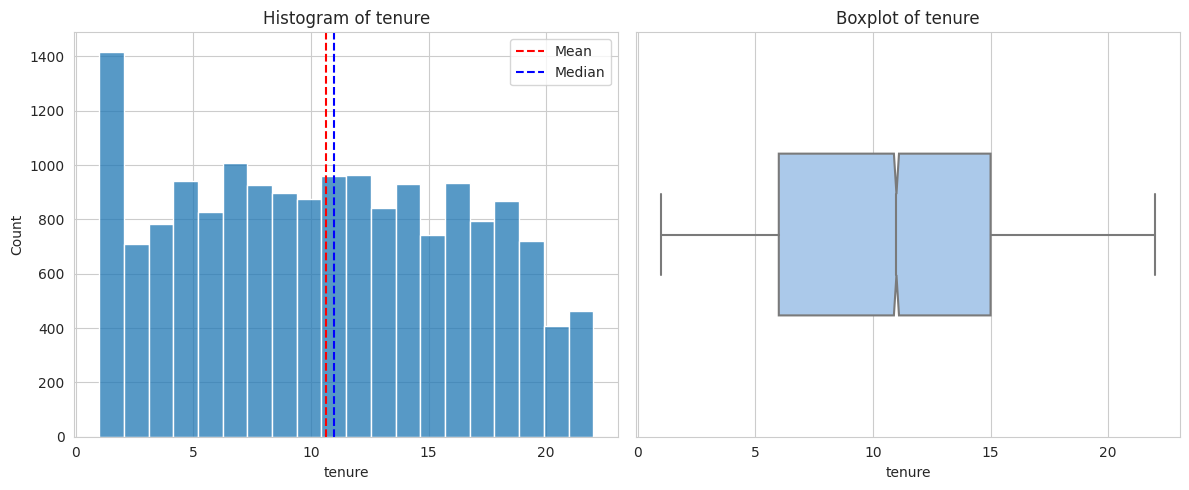

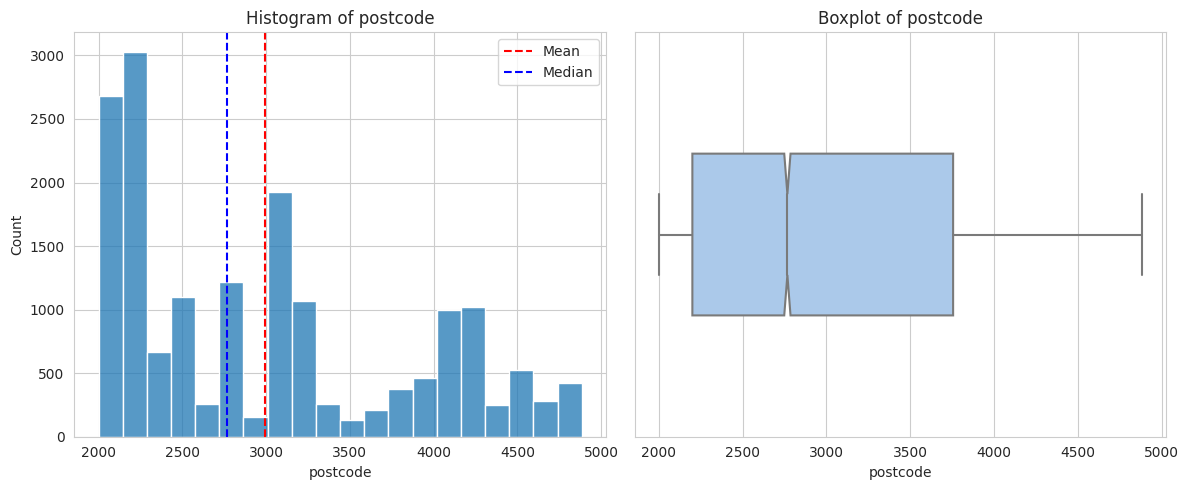

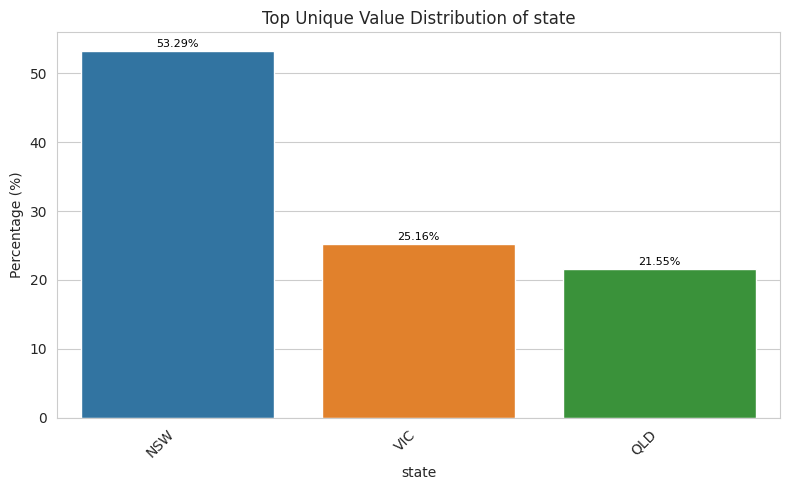

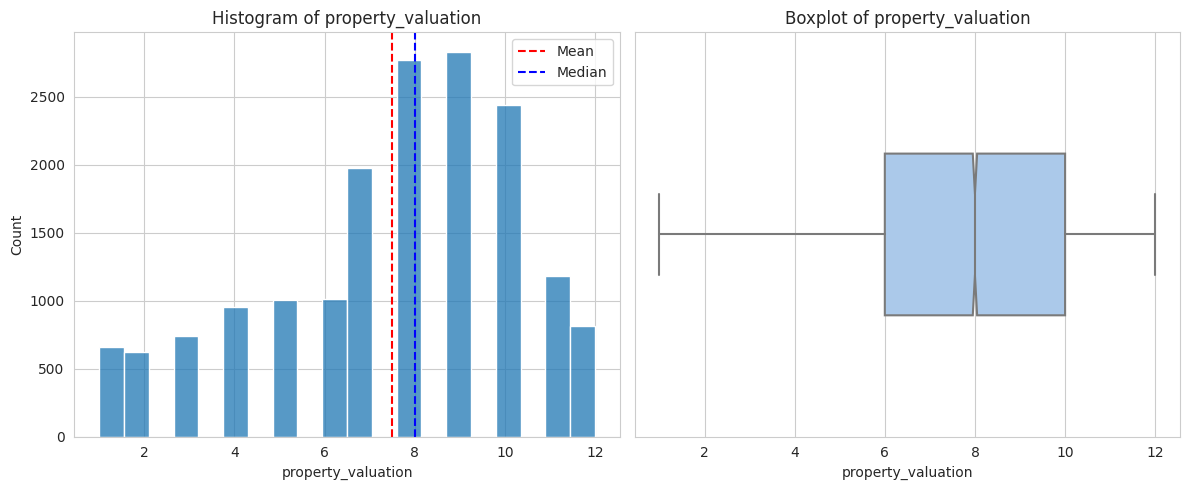

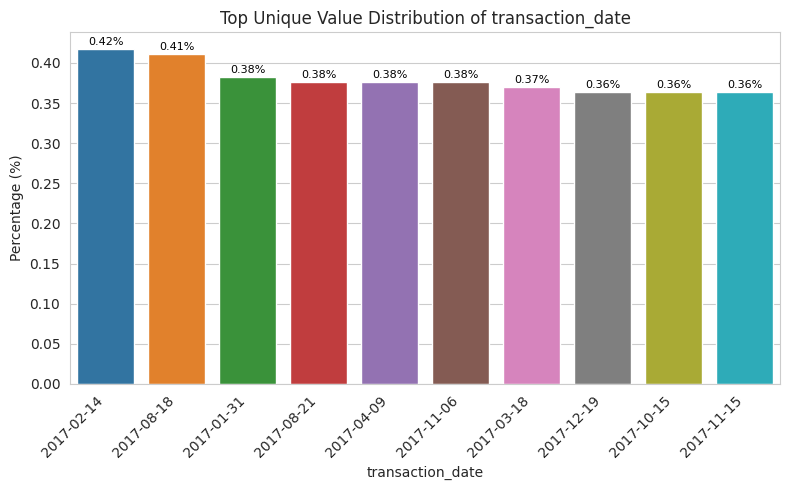

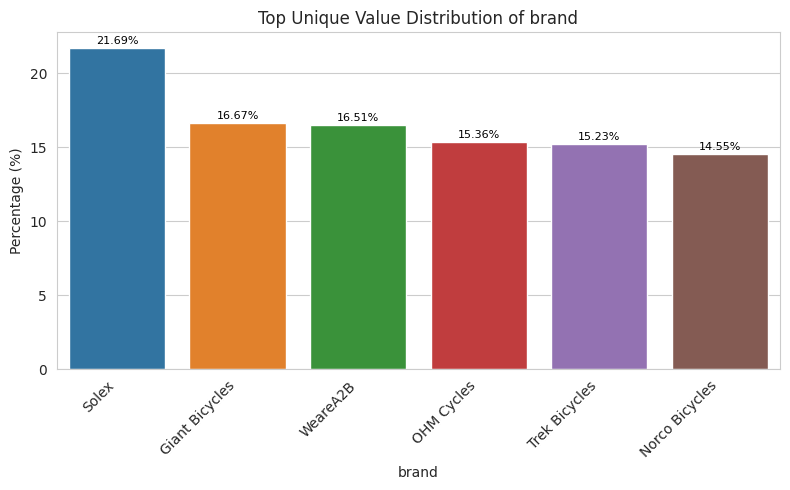

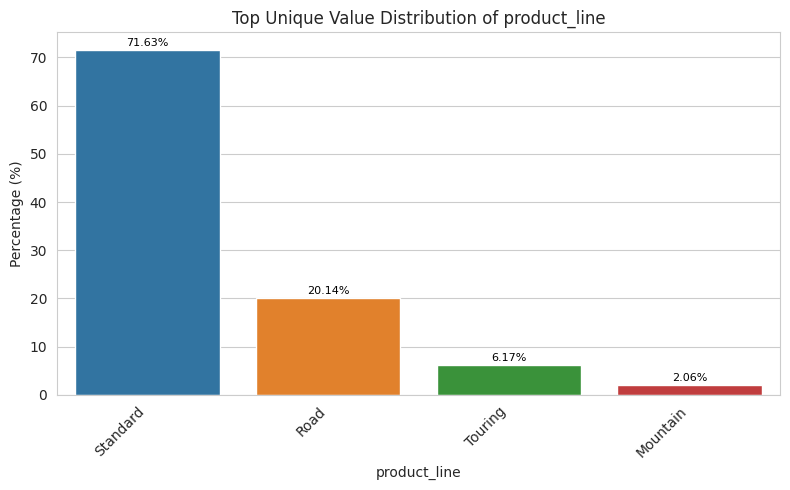

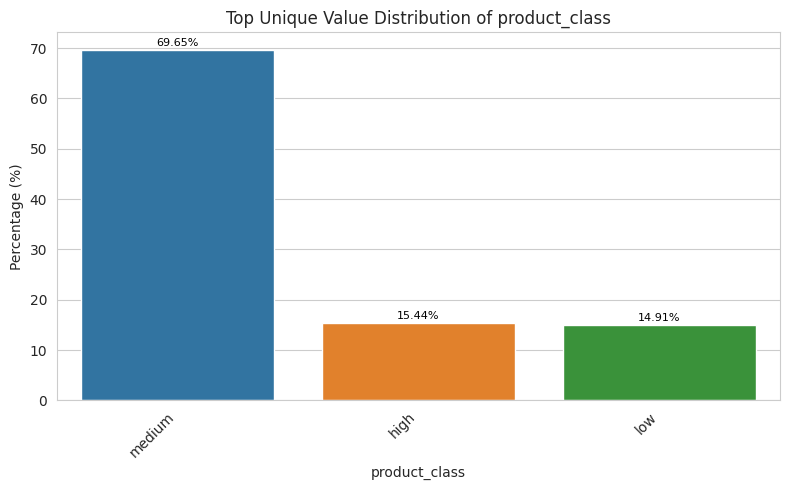

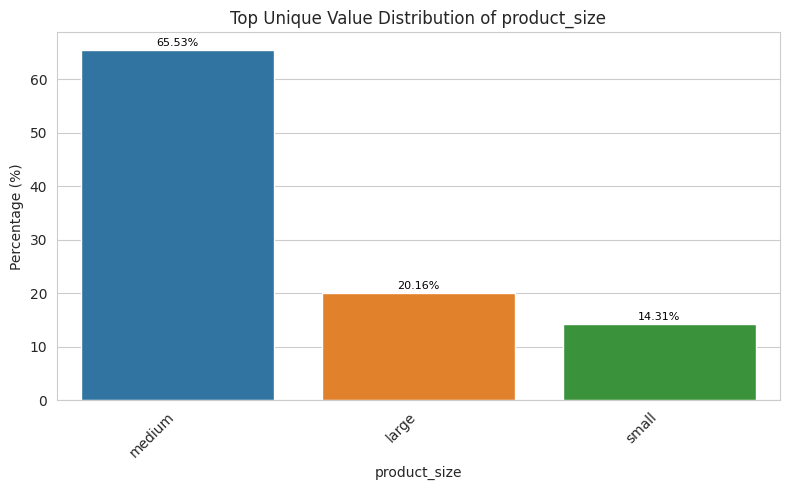

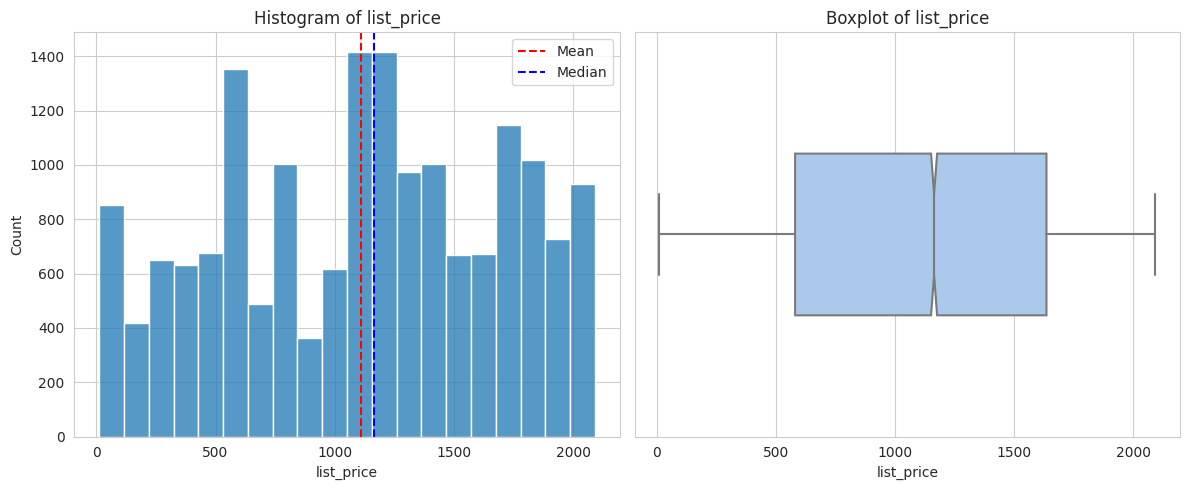

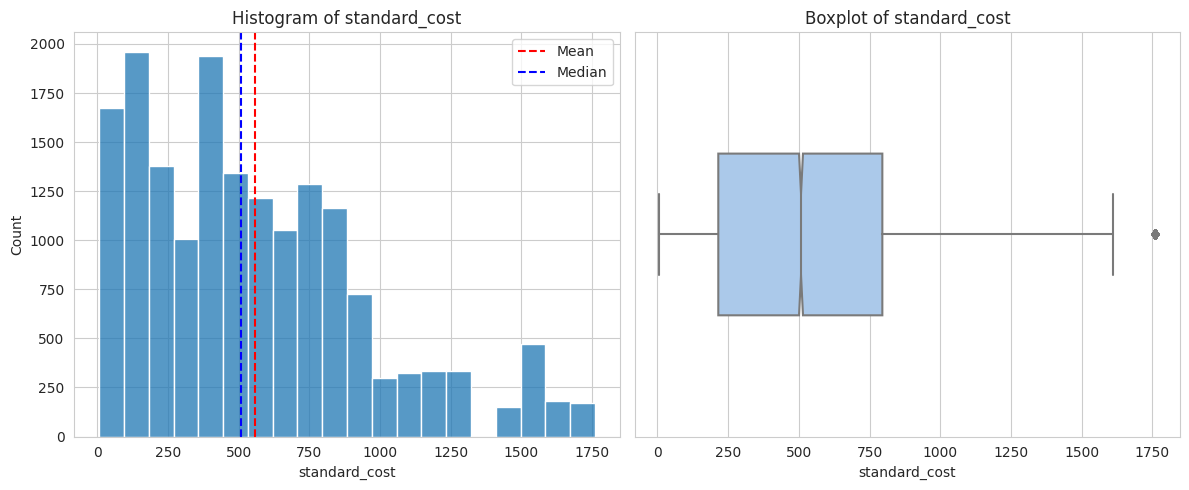

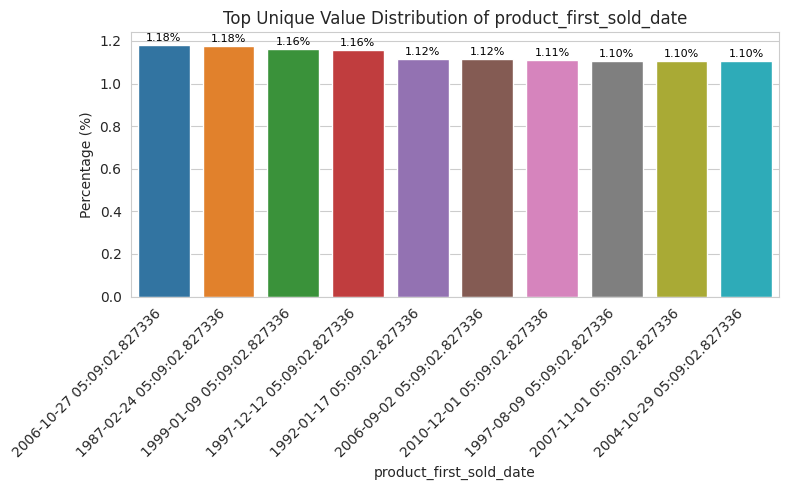

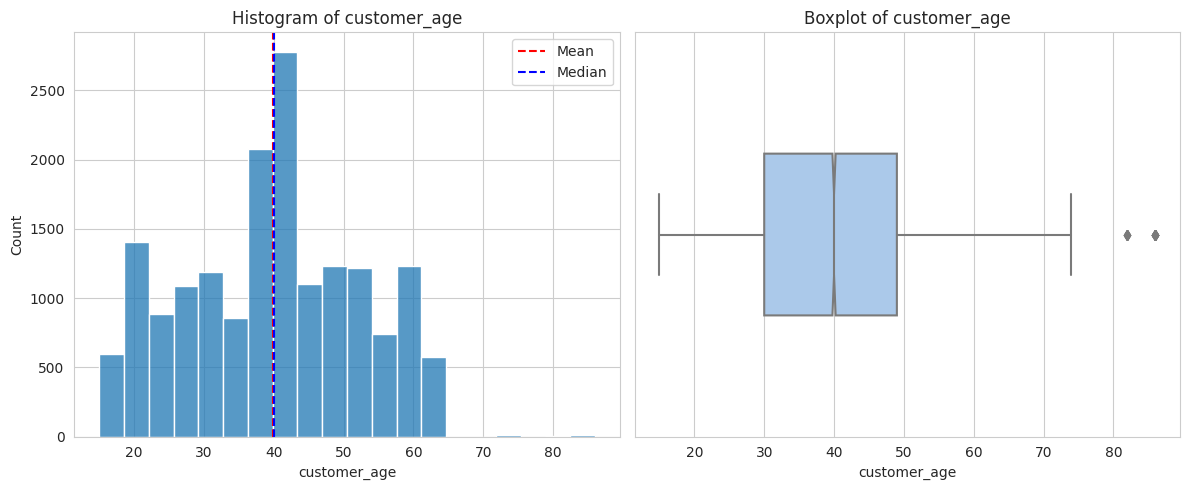

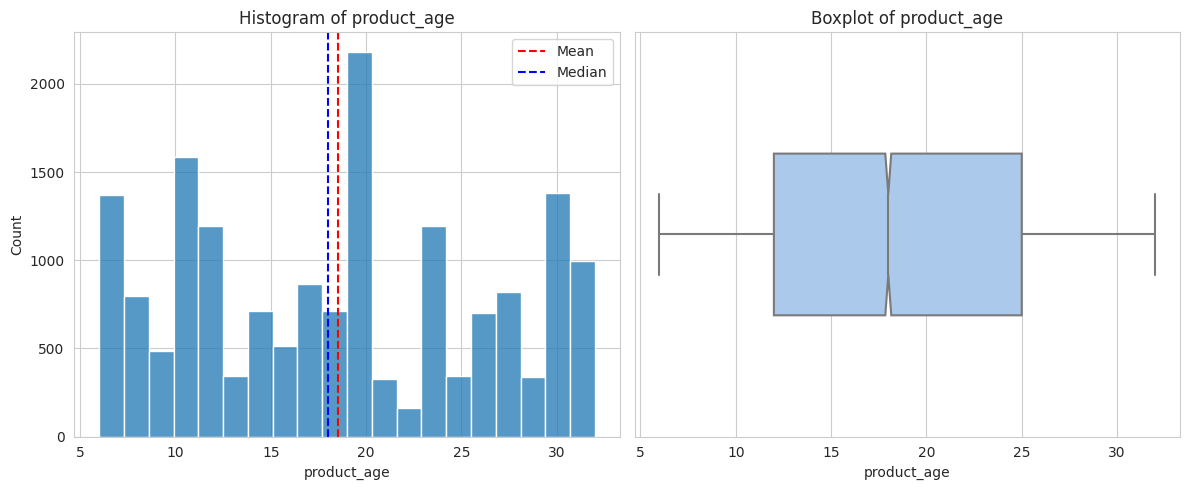

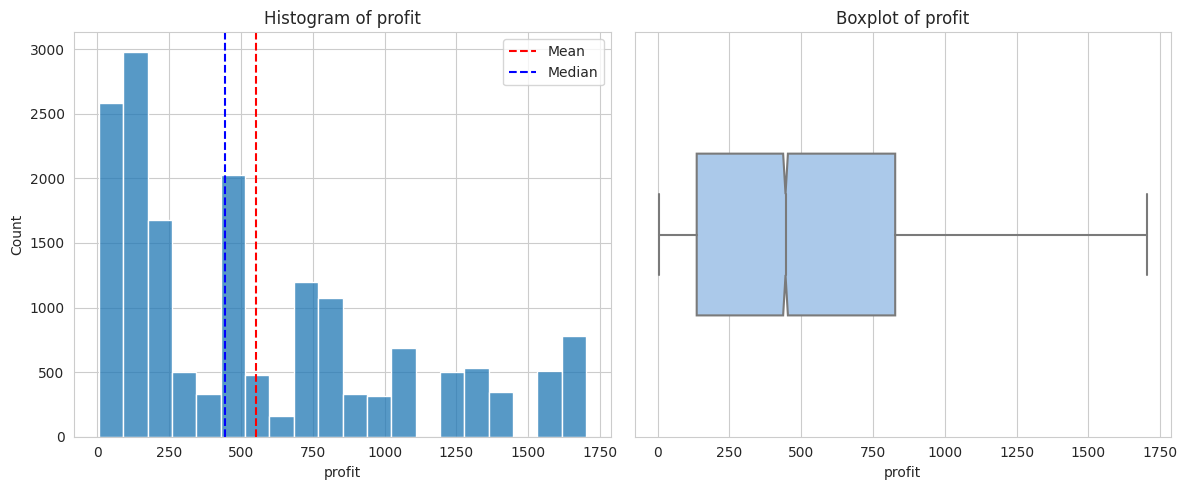

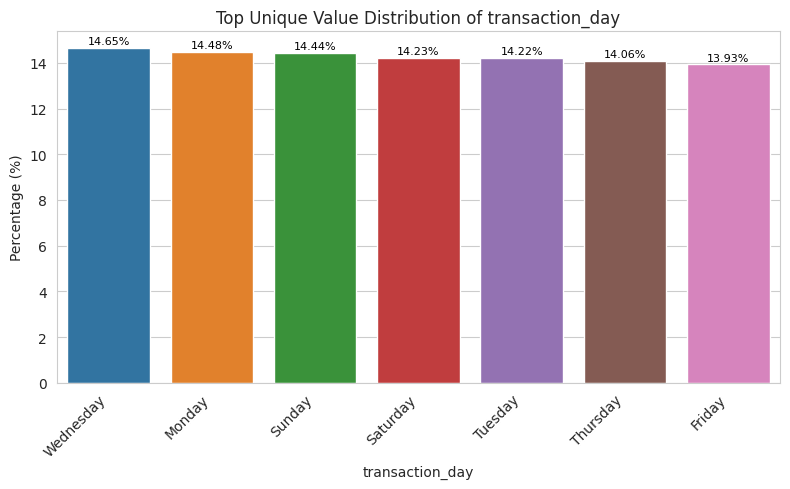

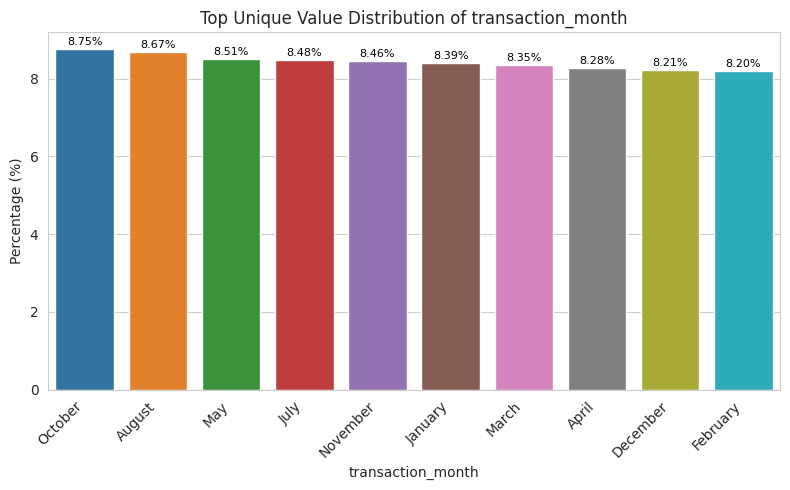

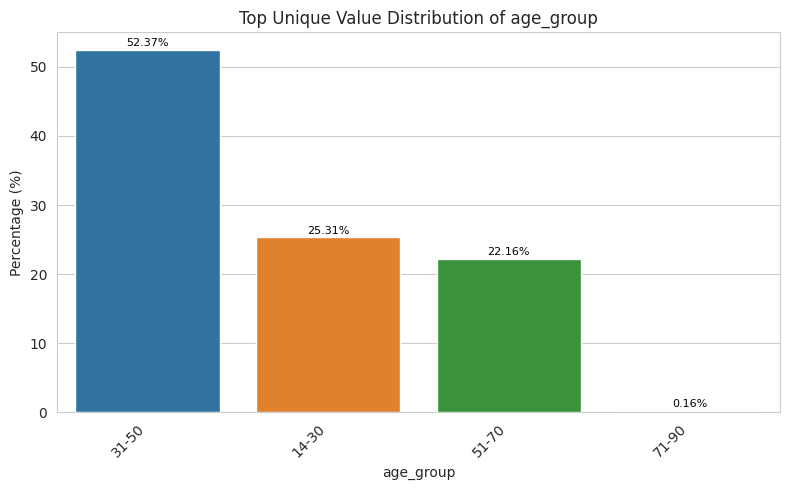

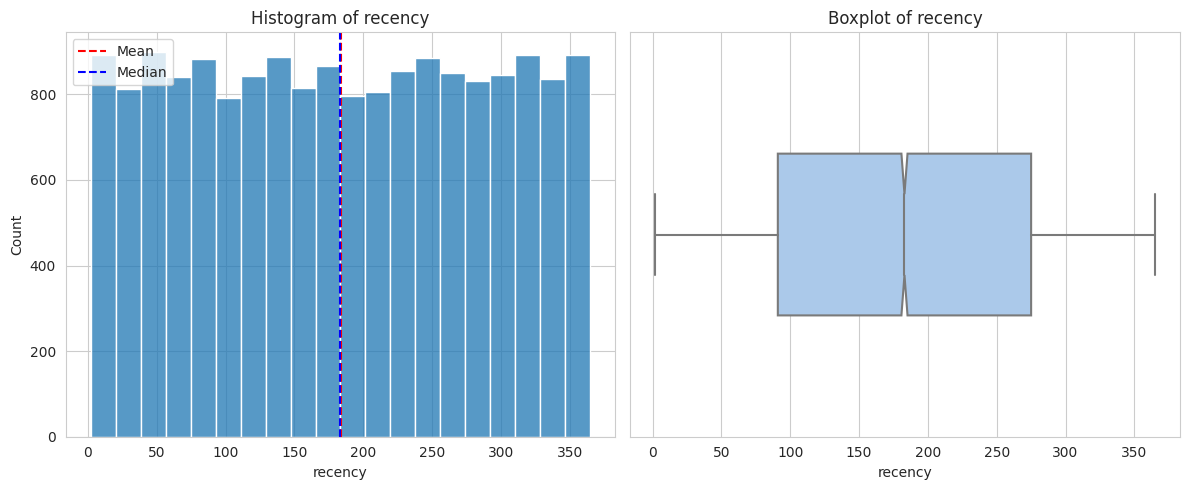

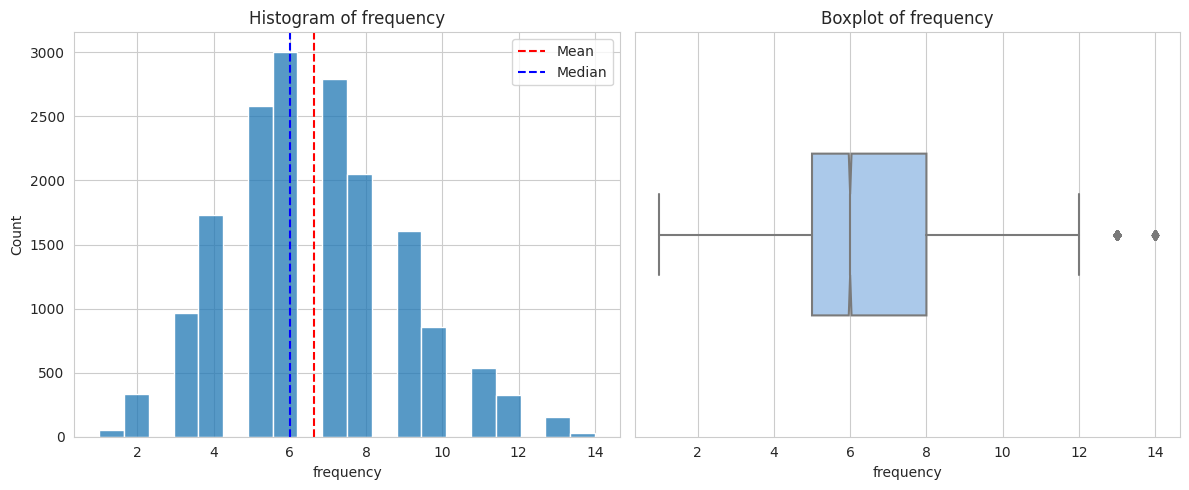

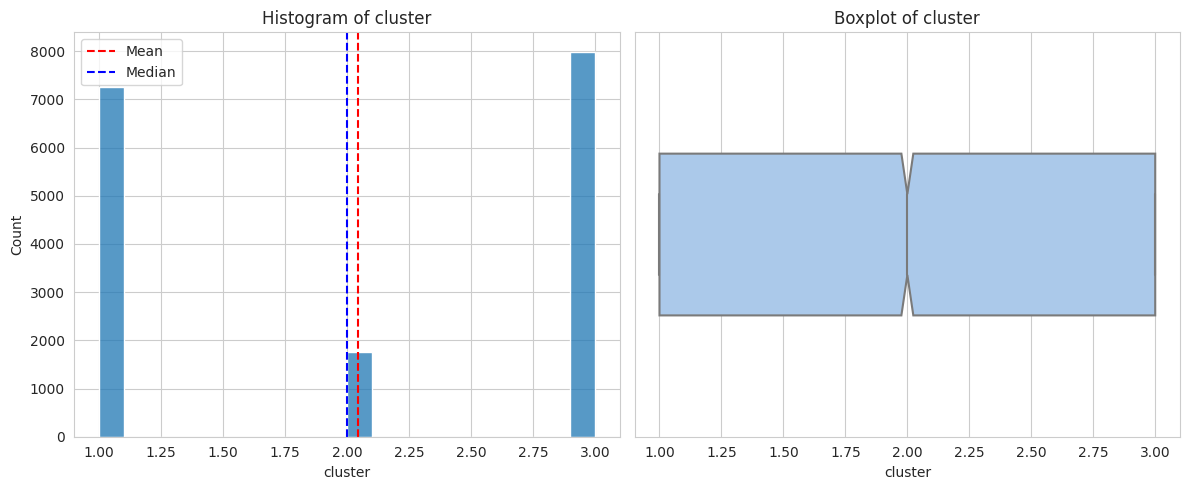

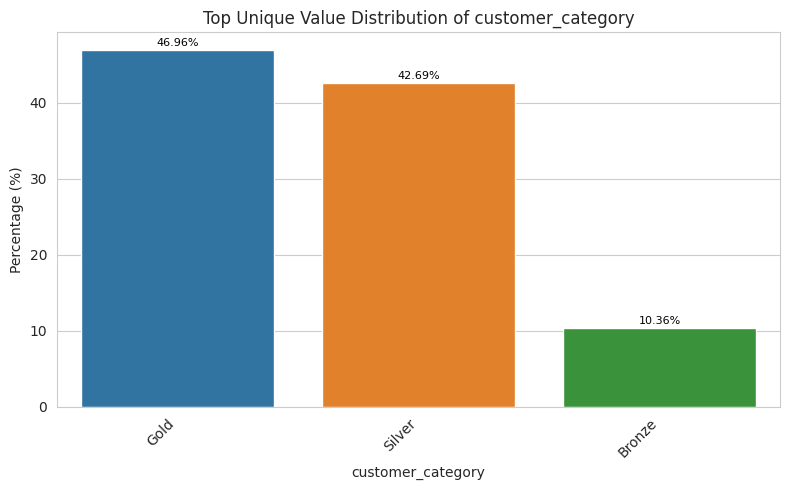

In [7]:
univariate_analysis(Reference)